In [11]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [12]:

def initgrid(L = 10, allup=False, ifplot=True):

    M=np.zeros([L,L])
    for i in range(len(M)):
        for j in range(len(M)):
            ran=np.random.random()
            if(ran<0.5):
                M[i,j] = 1
            else:
                if allup==False:
                    M[i,j] = -1
                else:
                    M[i,j] = 1
    if ifplot == True:
        plt.figure(figsize=(6,6))
        values = np.unique(M.ravel())
    
        im = plt.imshow(M, interpolation='none')
        colors = [ im.cmap(im.norm(value)) for value in values]
        patches = [ mpatches.Patch(color=colors[i], label="Spin {l}".format(l=values[i]) ) for i in range(len(values)) ]
        plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
        plt.title('Randomozed sipns on grid')
        plt.grid(True)
        plt.xticks(ticks=np.linspace(0,9,10))
        plt.yticks(ticks=np.linspace(0,9,10))

        plt.show()
    return M, L

In [13]:
def calcMagnetization(M):
    spin = 0
    for i in range(len(M)):
        for j in range(len(M)):
            if M[i,j]>0:
                spin = spin+1
            else:
                spin = spin-1
    return spin/len(M)**2

In [14]:
def earlystopping(array, delta, index):
    data=np.array(array[index-100:])
    ave1=np.average(data)
    data2=np.array(array[index-20:])
    ave2=np.average(data2)
    if abs((ave2-ave1))<ave1/50:
        return True
    else:
        return False
    

In [15]:
def deltaE(S0, Sn, J, H):

  return 2 * S0 * (H + J * Sn)

In [23]:
def isingmodel (
    n = 100,
    h = 1,
    K = 1, 
    kbT = 5
):
    M, L = initgrid(10,False, False)
    Energy = 0
    for i in range(L):
        for j in range (L):
            Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]   
            Energy -= M[i,j]*(h+K*Sn)
    magnetization = []
    Energy=Energy/2
    energyHistory = []
    max=0
    for tstep in range(n):
        i=np.random.randint(10)
        j=np.random.randint(10)
        Sn = M[(i - 1) % L, j] + M[(i + 1) % L, j] + M[i, (j - 1) % L] + M[i, (j + 1) % L]
        
        dE= deltaE(M[i, j], Sn, K, h)
        if dE<0 or np.random.random()<np.exp(-dE/kbT):
            Energy+=dE
            M[i,j]=-1*M[i,j]
            
        energyHistory.append(Energy)
        magnetization.append(calcMagnetization(M))
        if tstep>100:
            if earlystopping(magnetization,0.1,tstep) == True:
                max=tstep
                break
    
    if max == 0:
        max=n
    return energyHistory,M,max, magnetization, np.average(np.array(magnetization[max-100:]))
        

Process:0/100 (es:0)
Process:1/100 (es:1)
Process:2/100 (es:1)
Process:3/100 (es:2)
Process:4/100 (es:2)
Process:5/100 (es:3)
Process:6/100 (es:4)
Process:7/100 (es:5)
Process:8/100 (es:5)
Process:9/100 (es:5)
Process:10/100 (es:5)
Process:11/100 (es:6)
Process:12/100 (es:7)
Process:13/100 (es:8)
Process:14/100 (es:9)
Process:15/100 (es:10)
Process:16/100 (es:10)
Process:17/100 (es:10)
Process:18/100 (es:11)
Process:19/100 (es:11)
Process:20/100 (es:11)
Process:21/100 (es:12)
Process:22/100 (es:13)
Process:23/100 (es:14)
Process:24/100 (es:14)
Process:25/100 (es:14)
Process:26/100 (es:14)
Process:27/100 (es:14)
Process:28/100 (es:15)
Process:29/100 (es:16)
Process:30/100 (es:17)
Process:31/100 (es:18)
Process:32/100 (es:18)
Process:33/100 (es:18)
Process:34/100 (es:19)
Process:35/100 (es:20)
Process:36/100 (es:21)
Process:37/100 (es:22)
Process:38/100 (es:23)
Process:39/100 (es:24)
Process:40/100 (es:25)
Process:41/100 (es:26)
Process:42/100 (es:27)
Process:43/100 (es:28)
Process:44/10

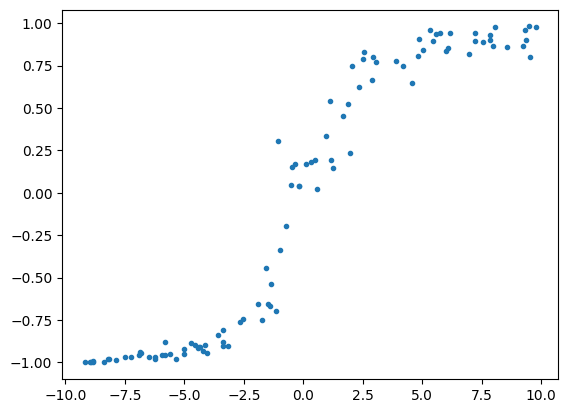

In [31]:
ave= []
H=[]
es=0
for i in range(100):
    h=np.random.random()*20-10
    Data,M,n, magnetization,average=isingmodel(5000,h,1,5)
    if n<5000:
        es+=1
    print(f"Process:{i}/{100} (es:{es})")
    ave.append(average)
    H.append(h)
plt.plot(H,ave,'.')


In [18]:
def susceptibility(M,kbT):
    data= np.array(M)
    return (np.std(data))**2/kbT

In [19]:
H=[]
ave=[]
es=0
derivative=[]
hi=[]
#numrical method to approximate the derivative
for i in range(1000):
    h=np.random.random()*0.02
    Data, M, n, mag, H0 =isingmodel(10000,0,1,2)
    Data,M,n, magnetization,average=isingmodel(10000,h,1,2)

    if n<10000:
        es+=1
        derivative.append((average-H0)/h)
        print(f"Process:{i}/{100} (es:{es})")
        hi.append(susceptibility(mag[n-50:],1))
        ave.append(average)
        H.append(h)
plt.plot(H,derivative,'.')



Process:0/100 (es:1)


/home/axelk/.local/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/axelk/.local/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/axelk/.local/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Process:2/100 (es:2)
Process:4/100 (es:3)
Process:5/100 (es:4)
Process:7/100 (es:5)
Process:8/100 (es:6)
Process:9/100 (es:7)
Process:10/100 (es:8)
Process:11/100 (es:9)
Process:12/100 (es:10)
Process:14/100 (es:11)
Process:15/100 (es:12)
Process:16/100 (es:13)
Process:17/100 (es:14)
Process:18/100 (es:15)
Process:19/100 (es:16)
Process:20/100 (es:17)
Process:21/100 (es:18)
Process:23/100 (es:19)
Process:24/100 (es:20)
Process:26/100 (es:21)
Process:27/100 (es:22)
Process:29/100 (es:23)
Process:30/100 (es:24)
Process:32/100 (es:25)
Process:35/100 (es:26)
Process:37/100 (es:27)
Process:38/100 (es:28)
Process:39/100 (es:29)
Process:40/100 (es:30)
Process:41/100 (es:31)
Process:42/100 (es:32)
Process:45/100 (es:33)
Process:47/100 (es:34)
Process:49/100 (es:35)
Process:50/100 (es:36)
Process:51/100 (es:37)
Process:52/100 (es:38)
Process:53/100 (es:39)
Process:54/100 (es:40)
Process:55/100 (es:41)
Process:56/100 (es:42)
Process:58/100 (es:43)
Process:59/100 (es:44)
Process:60/100 (es:45)
Pr

KeyboardInterrupt: 

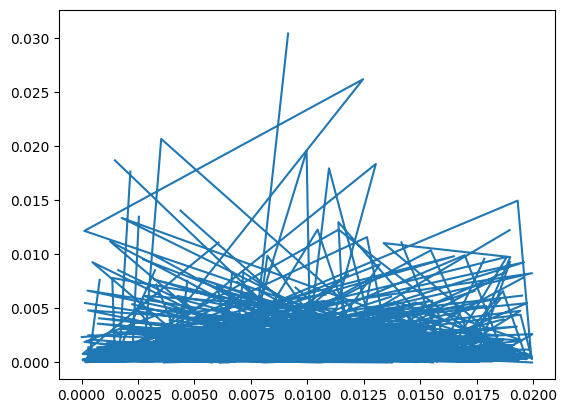

In [ ]:
plt.plot(H,hi)